In [1]:
#
# From https://minerl.io/docs/environments/index.html#id9
#
import gym
from gym import spaces
import minerl
import logging
import numpy as np
import collections
import torch
from itertools import chain

C:\Users\liamo\Anaconda3\envs\FallSemester\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [2]:
device = torch.device("cuda")

In [3]:
env = gym.make("MineRLNavigateDense-v0") # A MineRLNavigateDense-v0 env

In [13]:
# Run a random agent through the environment
def train(env, agent, config):
    
    num_episodes = config["NUM_EPISODES"]
    episodic_rewards = [0] * num_episodes
    episodic_moves = [0] * num_episodes
    
    for episode in range(num_episodes):
        obs = env.reset()
        done = False
        net_reward = 0
        steps = 0
        
        obs["pov"] = obs["pov"].reshape(3,64,64)
        obs["pov"] = torch.from_numpy(obs["pov"]).float().to(device).unsqueeze(0)
        obs["compassAngle"] = torch.from_numpy(obs["compassAngle"]).float().to(device).unsqueeze(0)
                                      
        while not done:
            # this is only outputting the camera controls
            camera_action = agent.step(obs)
    
            env_action = {}
            
            print(camera_action)
            
            env_action["camera"] = camera_action.detach().cpu().numpy()
            env_action["attack"] = 0
            env_action["back"] = 0
            env_action["forward"] = 1
            env_action["jump"] = 1
            env_action["left"] = 0
            env_action["place"] = "none"
            env_action["right"] = 0
            env_action["sneak"] = 0
            env_action["sprint"] = 0
    
            steps = steps + 1
            next_obs, reward, done, info = env.step(env_action)
    
            if done:
                next_pov_tensor = None
            else:
                next_obs["pov"] = next_obs["pov"].reshape(3,64,64)
                next_obs["pov"] = torch.from_numpy(next_obs["pov"]).float().to(device).unsqueeze(0)
                next_obs["compassAngle"] = torch.from_numpy(next_obs["compassAngle"]).float().to(device).unsqueeze(0)
    
            camera_action = camera_action.unsqueeze(0)
            reward = torch.tensor([reward], device=device)
            done = torch.tensor([done], device=device).int()
            
            
            agent.memory.store_transition(obs, camera_action, next_obs, reward, done)
            if steps % config["EVAL_INTERVAL"] == 0:
                    agent.evaluate()
            obs = next_obs     
            episodic_rewards[episode] += reward
            episodic_moves[episode] += 1
    
        print(episode)
        print(episodic_rewards[episode])
    return episodic_rewards, episodic_moves        
     
    # Do something

In [16]:
%run SoftAC.ipynb
agent_config = {
    "ALPHA": .4,
    "GAMMA": .7,
    "POLYAK": .9,
    "LEARNING_RATE": .00001,
    "MAX_MEMORY": 10000,
    "BATCH_SIZE": 64
}
agent = SoftACAgent(env, agent_config)

In [17]:
train_config = {
    "EVAL_INTERVAL": 10,
    "NUM_EPISODES": 5
}
rew, ep, moves = train(env, agent, train_config)

tensor([[-180.0000, -179.9102]], device='cuda:0')
tensor([[-179.9713, -179.9966]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[ 179.9998, -179.9987]], device='cuda:0')
tensor([[-179.9999, -179.9997]], device='cuda:0')
tensor([[-179.9977, -179.9892]], device='cuda:0')
tensor([[-180.0000, -179.9905]], device='cuda:0')
tensor([[-180.0000, -179.9644]], device='cuda:0')
tensor([[ 172.4283, -179.9807]], device='cuda:0')
tensor([[-180.0000, -179.9888]], device='cuda:0')
tensor([[-180.0000, -179.9837]], device='cuda:0')
tensor([[ 176.1841, -179.9718]], device='cuda:0')
tensor([[-180.0000, -179.9980]],

tensor([[-179.9986, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[  -8.2874, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')


tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-179.9695, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')


tensor([[-179.9999, -179.9993]], device='cuda:0')
tensor([[-180.0000, -179.9995]], device='cuda:0')
tensor([[-180.0000, -179.9973]], device='cuda:0')
tensor([[-180.0000, -179.9996]], device='cuda:0')
tensor([[-180.0000, -179.9994]], device='cuda:0')
tensor([[-180.0000, -179.9994]], device='cuda:0')
tensor([[-180.0000, -179.9972]], device='cuda:0')
tensor([[-180.0000, -179.9989]], device='cuda:0')
tensor([[-180.0000, -179.9991]], device='cuda:0')
tensor([[-180.0000, -179.9994]], device='cuda:0')
tensor([[-180.0000, -179.9990]], device='cuda:0')
tensor([[-180.0000, -179.9996]], device='cuda:0')
tensor([[-178.9407, -179.9992]], device='cuda:0')
tensor([[-179.5554, -179.9997]], device='cuda:0')
tensor([[-180.0000, -179.9982]], device='cuda:0')
tensor([[-180.0000, -179.9977]], device='cuda:0')
tensor([[-180.0000, -179.9979]], device='cuda:0')
tensor([[-180.0000, -179.9995]], device='cuda:0')
tensor([[-178.9689, -179.9988]], device='cuda:0')
tensor([[-180.0000, -179.9998]], device='cuda:0')


tensor([[-179.9997,   51.3864]], device='cuda:0')
tensor([[-180.0000, -179.9906]], device='cuda:0')
tensor([[-180.0000, -179.6634]], device='cuda:0')
tensor([[-180.0000, -169.3830]], device='cuda:0')
tensor([[-173.5905, -178.9180]], device='cuda:0')
tensor([[-180.0000, -179.6207]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.0000, -179.9351]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.0000, -179.6383]], device='cuda:0')
tensor([[-180.0000, -179.9689]], device='cuda:0')
tensor([[-180.0000, -179.8000]], device='cuda:0')
tensor([[-180.0000, -179.9907]], device='cuda:0')
tensor([[-180.0000, -179.9979]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.0000, -179.9995]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000,  -65.4735]], device='cuda:0')
tensor([[-180.0000,  179.2521]], device='cuda:0')
tensor([[-180.0000, -180

tensor([[180.0000, 179.9976]], device='cuda:0')
tensor([[180.0000, 179.9970]], device='cuda:0')
tensor([[180.0000, 179.9978]], device='cuda:0')
tensor([[180.0000, 179.9973]], device='cuda:0')
tensor([[180.0000, 179.9979]], device='cuda:0')
tensor([[180.0000, 179.9974]], device='cuda:0')
tensor([[180.0000, 179.9976]], device='cuda:0')
tensor([[180.0000, 179.9973]], device='cuda:0')
tensor([[180.0000, 179.9979]], device='cuda:0')
tensor([[180.0000, 179.9973]], device='cuda:0')
tensor([[180.0000, 179.9975]], device='cuda:0')
tensor([[180.0000, 179.9969]], device='cuda:0')
tensor([[180.0000, 179.9973]], device='cuda:0')
tensor([[180.0000, 179.9971]], device='cuda:0')
tensor([[180.0000, 179.9975]], device='cuda:0')
tensor([[180.0000, 179.9967]], device='cuda:0')
tensor([[180.0000, 179.9975]], device='cuda:0')
tensor([[180.0000, 179.9970]], device='cuda:0')
tensor([[180.0000, 179.9975]], device='cuda:0')
tensor([[180.0000, 179.9969]], device='cuda:0')
tensor([[180.0000, 179.9969]], device='c

tensor([[180.0000, 179.9539]], device='cuda:0')
tensor([[180.0000, 179.9452]], device='cuda:0')
tensor([[180.0000, 179.9518]], device='cuda:0')
tensor([[180.0000, 179.9479]], device='cuda:0')
tensor([[180.0000, 179.9514]], device='cuda:0')
tensor([[180.0000, 179.9453]], device='cuda:0')
tensor([[180.0000, 179.9287]], device='cuda:0')
tensor([[180.0000, 179.9181]], device='cuda:0')
tensor([[180.0000, 179.9262]], device='cuda:0')
tensor([[180.0000, 179.9249]], device='cuda:0')
tensor([[180.0000, 179.9270]], device='cuda:0')
tensor([[180.0000, 179.9242]], device='cuda:0')
tensor([[180.0000, 179.9304]], device='cuda:0')
tensor([[180.0000, 179.9182]], device='cuda:0')
tensor([[180.0000, 179.9331]], device='cuda:0')
tensor([[180.0000, 179.9272]], device='cuda:0')
tensor([[180.0000, 179.8941]], device='cuda:0')
tensor([[180.0000, 179.8677]], device='cuda:0')
tensor([[180.0000, 179.8872]], device='cuda:0')
tensor([[180.0000, 179.8684]], device='cuda:0')
tensor([[180.0000, 179.8796]], device='c

tensor([[-179.9976,  107.5202]], device='cuda:0')
tensor([[-178.7424,  180.0000]], device='cuda:0')
tensor([[-179.9925, -177.0838]], device='cuda:0')
tensor([[-179.9983, -179.9964]], device='cuda:0')
tensor([[-179.9966,  179.9987]], device='cuda:0')
tensor([[-178.2161, -179.2153]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-179.9993, -177.3520]], device='cuda:0')
tensor([[-169.7479, -180.0000]], device='cuda:0')
tensor([[-179.8998,  179.9770]], device='cuda:0')
tensor([[-179.9999,  179.9582]], device='cuda:0')
tensor([[-179.9999,  180.0000]], device='cuda:0')
tensor([[-179.9997,  179.9740]], device='cuda:0')
tensor([[-179.7600, -180.0000]], device='cuda:0')
tensor([[-180.0000,  179.9819]], device='cuda:0')
tensor([[-180.0000, -121.2213]], device='cuda:0')
tensor([[-180.0000, -179.3955]], device='cuda:0')
tensor([[-180.0000, -179.9999]], device='cuda:0')
tensor([[-179.4861,  175.1065]], device='cuda:0')
tensor([[-179.9636, -180.0000]], device='cuda:0')


tensor([[101.1152,  -3.7425]], device='cuda:0')
tensor([[134.7591,   1.4597]], device='cuda:0')
tensor([[179.9806,  35.1982]], device='cuda:0')
tensor([[179.9996,  12.8323]], device='cuda:0')
tensor([[-180.0000, -153.1990]], device='cuda:0')
tensor([[-180.0000,  179.9991]], device='cuda:0')
tensor([[-180.0000, -179.8477]], device='cuda:0')
tensor([[-179.9980, -179.9729]], device='cuda:0')
tensor([[-180.0000, -179.6895]], device='cuda:0')
tensor([[-180.0000, -105.7500]], device='cuda:0')
tensor([[-180.0000, -179.9972]], device='cuda:0')
tensor([[-179.8788, -174.3704]], device='cuda:0')
tensor([[-180.0000, -107.9159]], device='cuda:0')
tensor([[-179.9902,  178.4488]], device='cuda:0')
tensor([[-178.2558,  179.9541]], device='cuda:0')
tensor([[-178.6365, -169.9506]], device='cuda:0')
tensor([[-178.2842,  179.9810]], device='cuda:0')
tensor([[-179.6054,   53.7191]], device='cuda:0')
tensor([[-179.9904,   74.7424]], device='cuda:0')
tensor([[-10.8320, 111.0165]], device='cuda:0')
tensor([[1

tensor([[-180.0000,  176.9257]], device='cuda:0')
tensor([[-180.,  180.]], device='cuda:0')
tensor([[-180.0000,  180.0000]], device='cuda:0')
tensor([[-179.7402,  180.0000]], device='cuda:0')
tensor([[-179.2992,  179.9767]], device='cuda:0')
tensor([[-180.0000, -179.9507]], device='cuda:0')
tensor([[-179.9999,  180.0000]], device='cuda:0')
tensor([[-179.9183,  179.9960]], device='cuda:0')
tensor([[-178.0059,  179.9452]], device='cuda:0')
tensor([[-180.,  180.]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-180.0000,  176.0802]], device='cuda:0')
tensor([[-180.0000, -179.8939]], device='cuda:0')
tensor([[-180.0000,  179.9994]], device='cuda:0')
tensor([[-177.3552, -178.6021]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-179.9995, -179.8371]], device='cuda:0')
tensor([[-180.0000,  179.9941]], device='cuda:0')
tensor([[-179.9994,  -81.1622]], device='cuda:0')
tensor([[-100.5624, -179.9899]], device='cuda:0')
tensor([[-180.0000,  180

tensor([[-180.,  180.]], device='cuda:0')
tensor([[-180.0000, -174.6231]], device='cuda:0')
tensor([[-179.9965,  180.0000]], device='cuda:0')
tensor([[-180.0000,  180.0000]], device='cuda:0')
tensor([[-180.0000,  180.0000]], device='cuda:0')
tensor([[-180.,  180.]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.,  180.]], device='cuda:0')
tensor([[-155.9822, -179.9628]], device='cuda:0')
tensor([[-179.7736,  178.7256]], device='cuda:0')
tensor([[-180.0000,  179.5006]], device='cuda:0')
tensor([[-180.0000,  -27.8763]], device='cuda:0')
tensor([[-180.0000,  179.1041]], device='cuda:0')
tensor([[-180.0000, -147.9104]], device='cuda:0')
tensor([[-180.0000, -179.9774]], device='cuda:0')
tensor([[-179.9629, -179.9911]], device='cuda:0')
tensor([[-180.0000,  179.9998]], device='cuda:0')
tensor([[-154.1582, -179.9990]], device='cuda:0')
tensor([[-180.0000,  179.9921]], device='cuda:0')
tensor([[-179.9823,  160.6413]], device='cuda:0')
tensor([[-180.0000,  180.0000]],

tensor([[-180.0000, -177.7055]], device='cuda:0')
tensor([[ -41.5695, -177.0636]], device='cuda:0')
tensor([[-178.8929, -177.2596]], device='cuda:0')
tensor([[-179.9982, -177.4929]], device='cuda:0')
tensor([[-164.0156, -177.5806]], device='cuda:0')
tensor([[-179.7785, -178.3043]], device='cuda:0')
tensor([[-180.0000, -178.1194]], device='cuda:0')
tensor([[-180.0000, -175.9760]], device='cuda:0')
tensor([[-180.0000,  179.8723]], device='cuda:0')
tensor([[-180.0000, -180.0000]], device='cuda:0')
tensor([[-179.9996,  -42.3119]], device='cuda:0')
tensor([[-180.0000,  174.0851]], device='cuda:0')
tensor([[-180.0000, -178.2700]], device='cuda:0')
tensor([[-180.0000, -151.4338]], device='cuda:0')
tensor([[-180.0000,  179.9611]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180., -180.]], device='cuda:0')
tensor([[-180.0000,  178.3200]], device='cuda:0')
tensor([[-180.0000, -178.3149]], device='cuda:0')
tensor([[-138.3357, -177.9479]], device='cuda:0')
tensor([[-110.68

tensor([[-179.8517,  177.7008]], device='cuda:0')
tensor([[-179.9999,  180.0000]], device='cuda:0')
tensor([[-180.0000,  179.9997]], device='cuda:0')
tensor([[-180.0000, -179.9997]], device='cuda:0')
tensor([[-179.9999, -174.1856]], device='cuda:0')
tensor([[-179.9471,  180.0000]], device='cuda:0')
tensor([[-179.9998,  179.9969]], device='cuda:0')
tensor([[-179.9961,  179.9996]], device='cuda:0')
tensor([[-180.,  180.]], device='cuda:0')
tensor([[-179.9254, -179.9968]], device='cuda:0')
tensor([[-179.9999,  180.0000]], device='cuda:0')
tensor([[-180.0000,  179.8453]], device='cuda:0')
tensor([[-180.0000,  135.8150]], device='cuda:0')
tensor([[-180.0000,  170.0772]], device='cuda:0')
tensor([[-179.9915,  173.7706]], device='cuda:0')
tensor([[-180.0000,  170.9619]], device='cuda:0')
tensor([[-179.9737, -177.8372]], device='cuda:0')
tensor([[-179.9684, -177.1747]], device='cuda:0')
tensor([[-179.9992, -176.2782]], device='cuda:0')
tensor([[-180.0000, -176.2350]], device='cuda:0')
tensor([

tensor([[-179.3411, -150.9663]], device='cuda:0')
tensor([[-179.1515, -143.4327]], device='cuda:0')
tensor([[-179.9326, -147.0730]], device='cuda:0')
tensor([[-180.0000, -133.2430]], device='cuda:0')
tensor([[-179.4279, -145.1665]], device='cuda:0')
tensor([[-179.8398, -155.1422]], device='cuda:0')
tensor([[-179.7417, -162.1976]], device='cuda:0')
tensor([[-179.9986,  179.9742]], device='cuda:0')
tensor([[-179.9640,  180.0000]], device='cuda:0')
tensor([[-179.9208, -180.0000]], device='cuda:0')
tensor([[-179.9988, -180.0000]], device='cuda:0')
tensor([[-174.8690,  169.1830]], device='cuda:0')
tensor([[-175.5151, -180.0000]], device='cuda:0')
tensor([[-179.9982,  180.0000]], device='cuda:0')
tensor([[-170.5596, -179.9998]], device='cuda:0')
tensor([[-179.7533,  179.9989]], device='cuda:0')
tensor([[-180.0000,  179.6480]], device='cuda:0')
tensor([[-179.9894,  179.9951]], device='cuda:0')
tensor([[-179.9998,  104.9605]], device='cuda:0')
tensor([[-179.5306,  177.6025]], device='cuda:0')


tensor([[-172.4484,   -5.2915]], device='cuda:0')
tensor([[-132.7510, -148.4892]], device='cuda:0')
tensor([[-167.8017, -142.5653]], device='cuda:0')
tensor([[-177.8224,  -52.1327]], device='cuda:0')
tensor([[-163.7569,  106.0577]], device='cuda:0')
tensor([[-178.2451,  168.6636]], device='cuda:0')
tensor([[-143.5128,  -72.1014]], device='cuda:0')
tensor([[-137.8448, -155.7820]], device='cuda:0')
tensor([[-154.0240,   94.0340]], device='cuda:0')
tensor([[-179.7418,  179.0534]], device='cuda:0')
tensor([[ 1.9055, -2.5914]], device='cuda:0')
tensor([[-170.6359,  -70.7834]], device='cuda:0')
tensor([[-126.0498,   94.5026]], device='cuda:0')
tensor([[-153.9958,  167.8537]], device='cuda:0')
tensor([[-175.2292,  162.8937]], device='cuda:0')
tensor([[-80.3053, 177.1887]], device='cuda:0')
tensor([[-70.8686,  -1.3958]], device='cuda:0')
tensor([[-70.7848, 179.9926]], device='cuda:0')
tensor([[-112.3757,  167.8025]], device='cuda:0')
tensor([[ -91.0104, -165.5509]], device='cuda:0')
tensor([[-

tensor([[-155.7297,  146.1880]], device='cuda:0')
tensor([[-164.7038,  177.3318]], device='cuda:0')
tensor([[-133.3593,    8.1167]], device='cuda:0')
tensor([[-131.9268,  179.8973]], device='cuda:0')
tensor([[-179.4196,  177.2353]], device='cuda:0')
tensor([[-177.7514, -159.8063]], device='cuda:0')
tensor([[-173.1398,   35.2633]], device='cuda:0')
tensor([[-179.9640, -108.9640]], device='cuda:0')
tensor([[-176.4816, -167.2886]], device='cuda:0')
tensor([[-177.7807, -150.3370]], device='cuda:0')
tensor([[-177.3803, -169.0193]], device='cuda:0')
tensor([[-175.3685,   82.7305]], device='cuda:0')
tensor([[-179.3825, -172.7622]], device='cuda:0')
tensor([[-179.2872,  -91.5622]], device='cuda:0')
tensor([[-123.9377,  165.1153]], device='cuda:0')
tensor([[-133.2544,  178.0538]], device='cuda:0')
tensor([[ -92.6802, -137.9731]], device='cuda:0')
tensor([[-130.7981,    3.5193]], device='cuda:0')
tensor([[-154.7625,  -59.5264]], device='cuda:0')
tensor([[-176.5263, -138.7541]], device='cuda:0')


tensor([[-179.1533,  179.6238]], device='cuda:0')
tensor([[-179.5321,  140.7577]], device='cuda:0')
tensor([[-179.8470,   76.2260]], device='cuda:0')
tensor([[-172.8176, -106.5501]], device='cuda:0')
tensor([[-178.1287, -127.4366]], device='cuda:0')
tensor([[-179.8362, -132.0858]], device='cuda:0')
tensor([[-107.6213, -129.3494]], device='cuda:0')
tensor([[-179.9960,  -83.1279]], device='cuda:0')
tensor([[-129.7617, -101.3344]], device='cuda:0')
tensor([[ 126.7730, -131.6892]], device='cuda:0')
tensor([[-179.9872, -148.2645]], device='cuda:0')
tensor([[-179.8499, -159.6236]], device='cuda:0')
tensor([[-179.9991,   -4.8727]], device='cuda:0')
tensor([[-54.0746, -72.8246]], device='cuda:0')
tensor([[-175.1466, -111.7599]], device='cuda:0')
tensor([[-149.3837,  -97.5788]], device='cuda:0')
tensor([[129.6912, -67.0912]], device='cuda:0')
tensor([[-179.9674, -167.4360]], device='cuda:0')
tensor([[-162.4112, -164.5140]], device='cuda:0')
tensor([[-132.4739, -125.3550]], device='cuda:0')
tens

tensor([[-177.8471,  120.2576]], device='cuda:0')
tensor([[-154.1669,   84.8191]], device='cuda:0')
tensor([[-179.9536,   -4.7097]], device='cuda:0')
tensor([[-179.9598,   57.0891]], device='cuda:0')
tensor([[-178.8287, -120.2363]], device='cuda:0')
tensor([[-179.9771,   85.4228]], device='cuda:0')
tensor([[-165.8517,  -49.6728]], device='cuda:0')
tensor([[-167.2520,    6.5349]], device='cuda:0')
tensor([[-175.0822,  -42.1615]], device='cuda:0')
tensor([[-179.9774,  -44.3008]], device='cuda:0')
tensor([[-179.2268,  132.5182]], device='cuda:0')
tensor([[-179.6514,  -54.3431]], device='cuda:0')
tensor([[-179.6847, -165.9202]], device='cuda:0')
tensor([[-176.7086,  -64.7993]], device='cuda:0')
tensor([[-179.9465,  -76.9833]], device='cuda:0')
tensor([[-179.9743, -124.2994]], device='cuda:0')
tensor([[-164.6866,  -92.4132]], device='cuda:0')
tensor([[-176.2958, -157.6301]], device='cuda:0')
tensor([[-179.9938,   67.5901]], device='cuda:0')
tensor([[-179.4208, -100.6137]], device='cuda:0')


tensor([[-179.9929,   70.9414]], device='cuda:0')
tensor([[-179.4050,   33.4915]], device='cuda:0')
tensor([[-179.7828,    8.6838]], device='cuda:0')
tensor([[-176.7464, -145.0445]], device='cuda:0')
tensor([[-179.9772, -127.6835]], device='cuda:0')
tensor([[-179.6009, -129.3175]], device='cuda:0')
tensor([[-157.3833,  151.3167]], device='cuda:0')
tensor([[-124.5795,   31.0000]], device='cuda:0')
tensor([[-179.8491,   71.3966]], device='cuda:0')
tensor([[-141.0602,    2.7699]], device='cuda:0')
tensor([[-179.4239,  -45.9125]], device='cuda:0')
tensor([[-146.4190,  135.6895]], device='cuda:0')
tensor([[ 91.5731, -97.4764]], device='cuda:0')
tensor([[-179.7845, -115.2257]], device='cuda:0')
tensor([[-179.6147,   18.3418]], device='cuda:0')
tensor([[-179.8179,   73.6961]], device='cuda:0')
tensor([[-179.9391,  -80.0445]], device='cuda:0')
tensor([[-177.0686,   68.4082]], device='cuda:0')
tensor([[-156.0180, -119.2830]], device='cuda:0')
tensor([[-179.8916,  168.2354]], device='cuda:0')
te

tensor([[-179.9848, -145.3372]], device='cuda:0')
tensor([[-179.9684, -154.6242]], device='cuda:0')
tensor([[-179.7956,  -98.3904]], device='cuda:0')
tensor([[-147.6611, -124.2561]], device='cuda:0')
tensor([[-178.6799, -120.7170]], device='cuda:0')
tensor([[-179.9269,  -91.9449]], device='cuda:0')
tensor([[-173.3334, -164.4734]], device='cuda:0')
tensor([[-101.0133, -156.0608]], device='cuda:0')
tensor([[-179.9943, -154.8936]], device='cuda:0')
tensor([[-177.5221, -171.0154]], device='cuda:0')
tensor([[-179.9991, -117.0670]], device='cuda:0')
tensor([[-179.9996, -141.1764]], device='cuda:0')
tensor([[-175.2001, -148.9944]], device='cuda:0')
tensor([[-125.4612,  -74.7521]], device='cuda:0')
tensor([[-179.9355, -158.4922]], device='cuda:0')
tensor([[-178.4754, -121.8431]], device='cuda:0')
tensor([[-179.8607, -103.9440]], device='cuda:0')
tensor([[-169.4508, -155.2265]], device='cuda:0')
tensor([[-179.9978, -122.0806]], device='cuda:0')
tensor([[-179.8730,  -35.9421]], device='cuda:0')


tensor([[-177.0455,   29.9317]], device='cuda:0')
tensor([[-177.1443,  -29.4972]], device='cuda:0')
tensor([[-179.8757,  -85.5468]], device='cuda:0')
tensor([[-178.9940,  -26.1638]], device='cuda:0')
tensor([[-179.8927,   12.5073]], device='cuda:0')
tensor([[-178.1288, -116.2308]], device='cuda:0')
tensor([[-172.4232,   36.4271]], device='cuda:0')
tensor([[-179.7382,  -13.6064]], device='cuda:0')
tensor([[-163.7242, -123.6940]], device='cuda:0')
tensor([[-178.1373, -147.3052]], device='cuda:0')
tensor([[-179.2204, -102.1031]], device='cuda:0')
tensor([[-161.4277,   45.8972]], device='cuda:0')
tensor([[-179.9849,  105.0523]], device='cuda:0')
tensor([[-174.3616,  100.1731]], device='cuda:0')
tensor([[-179.9069,  -66.1768]], device='cuda:0')
tensor([[-173.8710,  -69.4378]], device='cuda:0')
tensor([[-173.1233, -116.9046]], device='cuda:0')
tensor([[-176.9401,  104.5983]], device='cuda:0')
tensor([[-164.4375, -118.6572]], device='cuda:0')
tensor([[-171.8871,  112.4002]], device='cuda:0')


tensor([[-167.5013,   53.7633]], device='cuda:0')
tensor([[-137.6071,  -42.1196]], device='cuda:0')
tensor([[-161.2536, -111.3800]], device='cuda:0')
tensor([[-176.0678, -165.8653]], device='cuda:0')
tensor([[-31.6853, -34.4620]], device='cuda:0')
tensor([[-77.8153,  49.1263]], device='cuda:0')
tensor([[-147.1003,  -44.5839]], device='cuda:0')
tensor([[-177.3171,    3.0192]], device='cuda:0')
tensor([[-174.1511,   37.5410]], device='cuda:0')
tensor([[-174.7910,  -22.7120]], device='cuda:0')
tensor([[ 18.3184, 113.8064]], device='cuda:0')
tensor([[-165.5953,  107.2026]], device='cuda:0')
tensor([[-140.9016,   21.7187]], device='cuda:0')
tensor([[-175.6275, -130.9975]], device='cuda:0')
tensor([[60.4669, 25.6358]], device='cuda:0')
tensor([[-179.0787,  -16.4008]], device='cuda:0')
tensor([[-179.3559,   44.5511]], device='cuda:0')
tensor([[-170.5228,   15.0147]], device='cuda:0')
tensor([[-168.8961,  -90.9589]], device='cuda:0')
tensor([[-165.0680,  -29.7009]], device='cuda:0')
tensor([[-

tensor([[-179.9052,  139.9745]], device='cuda:0')
tensor([[-176.3996,  -91.4665]], device='cuda:0')
tensor([[-177.9656, -150.9846]], device='cuda:0')
tensor([[-141.9987,   93.7716]], device='cuda:0')
tensor([[-175.2916, -102.8979]], device='cuda:0')
tensor([[-163.1875, -110.5274]], device='cuda:0')
tensor([[-177.6770,  -31.0263]], device='cuda:0')
tensor([[-179.1239,  -59.4010]], device='cuda:0')
tensor([[-178.0818,   15.3136]], device='cuda:0')
tensor([[-177.7823,  -66.4040]], device='cuda:0')
tensor([[-27.0669,  -3.7838]], device='cuda:0')
tensor([[-178.7276,  -81.8019]], device='cuda:0')
tensor([[-178.7394,  -26.1631]], device='cuda:0')
tensor([[-177.5980, -115.1655]], device='cuda:0')
tensor([[ -38.3032, -133.0135]], device='cuda:0')
tensor([[-145.1362,  -96.0335]], device='cuda:0')
tensor([[-179.3066,  161.5664]], device='cuda:0')
tensor([[-175.6006, -122.8469]], device='cuda:0')
tensor([[-165.4025,   26.9868]], device='cuda:0')
tensor([[-179.6690,   -2.9420]], device='cuda:0')
te

tensor([[-179.9006,  -42.3787]], device='cuda:0')
tensor([[-179.9245,  -61.2512]], device='cuda:0')
tensor([[-160.0955,  -43.1066]], device='cuda:0')
tensor([[-179.9963, -156.5574]], device='cuda:0')
tensor([[-173.3398, -122.0360]], device='cuda:0')
tensor([[-102.4573,  -86.0032]], device='cuda:0')
tensor([[-179.8061, -159.9520]], device='cuda:0')
tensor([[-166.8649,  -76.2150]], device='cuda:0')
tensor([[-179.8831, -163.3422]], device='cuda:0')
tensor([[-157.3198,   10.0651]], device='cuda:0')
tensor([[-169.2121, -120.6755]], device='cuda:0')
tensor([[-177.2866,   -5.9244]], device='cuda:0')
tensor([[-178.3020, -153.2426]], device='cuda:0')
tensor([[-172.1374,  132.1104]], device='cuda:0')
tensor([[-178.6569,   39.0458]], device='cuda:0')
tensor([[-179.8937,  -35.4270]], device='cuda:0')
tensor([[-179.9523, -118.1207]], device='cuda:0')
tensor([[-171.3386, -137.8743]], device='cuda:0')
tensor([[ -58.7292, -133.6799]], device='cuda:0')
tensor([[-179.3783,  -35.9692]], device='cuda:0')


tensor([[-177.0823, -152.6023]], device='cuda:0')
tensor([[-179.7971, -138.0704]], device='cuda:0')
tensor([[-104.0202,  -97.4627]], device='cuda:0')
tensor([[-179.7153,  -80.8369]], device='cuda:0')
tensor([[-179.8728,  -96.2450]], device='cuda:0')
tensor([[-179.6249, -156.0747]], device='cuda:0')
tensor([[-135.3573,  -16.3869]], device='cuda:0')
tensor([[-179.9977,   -3.5793]], device='cuda:0')
tensor([[-178.9349, -150.5104]], device='cuda:0')
tensor([[-178.4728, -103.8693]], device='cuda:0')
tensor([[-179.6559, -115.4850]], device='cuda:0')
tensor([[-179.9223, -108.5462]], device='cuda:0')
tensor([[-179.9199, -136.6396]], device='cuda:0')
tensor([[-174.7192,  -70.8242]], device='cuda:0')
tensor([[ -16.5662, -133.8530]], device='cuda:0')
tensor([[-179.9267, -140.0671]], device='cuda:0')
tensor([[-168.4642,  -96.2628]], device='cuda:0')
tensor([[-172.8597, -117.9962]], device='cuda:0')
tensor([[-81.9144, -51.2509]], device='cuda:0')
tensor([[-179.5247,  -36.5028]], device='cuda:0')
te

tensor([[-172.1725,  -75.2801]], device='cuda:0')
tensor([[-177.3481,  -94.2295]], device='cuda:0')
tensor([[-157.3484,   25.7757]], device='cuda:0')
tensor([[-173.7591,  -15.2810]], device='cuda:0')
tensor([[-115.0110,   95.3593]], device='cuda:0')
tensor([[-141.3846,  141.0579]], device='cuda:0')
tensor([[-167.7938,  133.6550]], device='cuda:0')
tensor([[-160.0426,   41.3750]], device='cuda:0')
tensor([[-118.9766,  -19.5838]], device='cuda:0')
tensor([[-10.8089,  46.0260]], device='cuda:0')
tensor([[-176.9485,  -75.9929]], device='cuda:0')
tensor([[-179.9770, -118.4862]], device='cuda:0')
tensor([[-168.8463, -112.0379]], device='cuda:0')
tensor([[-163.4288,   60.7374]], device='cuda:0')
tensor([[-153.4760,   66.0452]], device='cuda:0')
tensor([[-172.2520,  -52.4198]], device='cuda:0')
tensor([[-130.0514,   34.8645]], device='cuda:0')
tensor([[-124.9058,   84.0736]], device='cuda:0')
tensor([[-175.8951,  -22.2612]], device='cuda:0')
tensor([[-173.5011,   11.6613]], device='cuda:0')
te

tensor([[-179.2645,  -18.6957]], device='cuda:0')
tensor([[-157.5220, -106.3391]], device='cuda:0')
tensor([[-108.4362,   66.3947]], device='cuda:0')
tensor([[-174.1930, -134.5294]], device='cuda:0')
tensor([[-179.9120, -151.8202]], device='cuda:0')
tensor([[-173.0287,    1.0737]], device='cuda:0')
tensor([[-179.4838,  -25.9294]], device='cuda:0')
tensor([[24.7713, 46.8822]], device='cuda:0')
tensor([[-176.0858,  132.5667]], device='cuda:0')
tensor([[-150.8176, -143.4947]], device='cuda:0')
tensor([[-137.0926,   -0.2690]], device='cuda:0')
tensor([[-178.4886,   19.6853]], device='cuda:0')
tensor([[-177.1171, -140.6936]], device='cuda:0')
tensor([[-179.0959,   37.7102]], device='cuda:0')
tensor([[-94.0577, -52.3392]], device='cuda:0')
tensor([[-168.4614,  -11.4801]], device='cuda:0')
tensor([[-160.2387,  -31.2706]], device='cuda:0')
tensor([[-179.2160, -119.7493]], device='cuda:0')
tensor([[-131.0919, -166.0199]], device='cuda:0')
tensor([[-176.7294,  -72.9986]], device='cuda:0')
tensor

tensor([[-151.2211, -130.7987]], device='cuda:0')
tensor([[-178.5150,   -1.8010]], device='cuda:0')
tensor([[-178.3692,  -26.6661]], device='cuda:0')
tensor([[-167.8095,   30.3762]], device='cuda:0')
tensor([[-172.7621, -102.4170]], device='cuda:0')
tensor([[-145.3014, -136.2626]], device='cuda:0')
tensor([[-162.9807,  -26.1190]], device='cuda:0')
tensor([[-164.4881, -159.8242]], device='cuda:0')
tensor([[-177.8637, -121.0608]], device='cuda:0')
tensor([[-159.6044,  -87.6483]], device='cuda:0')
tensor([[-179.6653, -143.6559]], device='cuda:0')
tensor([[ -32.5695, -135.5214]], device='cuda:0')
tensor([[-113.1572,  -28.7413]], device='cuda:0')
tensor([[-177.4895,   93.0401]], device='cuda:0')
tensor([[-115.1352,  -17.4905]], device='cuda:0')
tensor([[148.3317, -60.6079]], device='cuda:0')
tensor([[-156.0553,  144.0432]], device='cuda:0')
tensor([[-170.9769,   67.0222]], device='cuda:0')
tensor([[-173.9098,  -55.0919]], device='cuda:0')
tensor([[-179.7337,  -58.4752]], device='cuda:0')
te

tensor([[-146.9201,  -87.0868]], device='cuda:0')
tensor([[-93.3717,  21.1800]], device='cuda:0')
tensor([[-177.9221,  -20.5631]], device='cuda:0')
tensor([[-133.9362,   -7.6472]], device='cuda:0')
tensor([[-174.7992,   21.5174]], device='cuda:0')
tensor([[-116.1193,   67.5933]], device='cuda:0')
tensor([[-169.6853,   65.0671]], device='cuda:0')
tensor([[-166.4448,   87.6465]], device='cuda:0')
tensor([[-103.8861,  153.5835]], device='cuda:0')
tensor([[-95.4896,  41.9498]], device='cuda:0')
tensor([[-85.5221, -60.6090]], device='cuda:0')
tensor([[-133.6014,  -64.4245]], device='cuda:0')
tensor([[42.9405, 53.0110]], device='cuda:0')
tensor([[-179.6047,  -76.2006]], device='cuda:0')
tensor([[-179.9644, -122.4903]], device='cuda:0')
tensor([[-134.5652,   98.2275]], device='cuda:0')
tensor([[ -75.0485, -126.3081]], device='cuda:0')
tensor([[-138.7271, -123.0947]], device='cuda:0')
tensor([[-153.8529,  -55.8045]], device='cuda:0')
tensor([[-175.4981,  110.3280]], device='cuda:0')
tensor([[-

tensor([[-138.9744,   -0.9666]], device='cuda:0')
tensor([[-177.4598,  -62.4060]], device='cuda:0')
tensor([[-149.4003, -132.9245]], device='cuda:0')
tensor([[-142.7805, -116.6172]], device='cuda:0')
tensor([[-157.6833,  -78.7513]], device='cuda:0')
tensor([[ -8.2932, -17.8517]], device='cuda:0')
tensor([[-179.7677,    1.8001]], device='cuda:0')
tensor([[126.8993, -47.5894]], device='cuda:0')
tensor([[-179.9911, -154.9775]], device='cuda:0')
tensor([[-172.6736,  -29.0830]], device='cuda:0')
tensor([[-177.3625, -114.1261]], device='cuda:0')
tensor([[-173.5570,   35.1876]], device='cuda:0')
tensor([[-160.5078,  -14.4274]], device='cuda:0')
tensor([[-170.4663,   -1.5247]], device='cuda:0')
tensor([[-172.4319,  -56.2057]], device='cuda:0')
tensor([[-169.4980,   22.8214]], device='cuda:0')
tensor([[-178.9695,    2.9709]], device='cuda:0')
tensor([[-139.0965,  -40.3353]], device='cuda:0')
tensor([[-146.4856,  -60.0850]], device='cuda:0')
tensor([[-174.0711,   -5.6365]], device='cuda:0')
tens

tensor([[-178.9340, -116.3049]], device='cuda:0')
tensor([[-175.5441, -111.9245]], device='cuda:0')
tensor([[-175.8800, -143.6494]], device='cuda:0')
tensor([[-178.9034, -112.1281]], device='cuda:0')
tensor([[-179.3977,   39.8757]], device='cuda:0')
tensor([[-179.9832,  -88.3048]], device='cuda:0')
tensor([[-115.2856,  -25.1910]], device='cuda:0')
tensor([[-178.3356,   12.6166]], device='cuda:0')
tensor([[-174.0620,  -25.1721]], device='cuda:0')
tensor([[-178.1056,  -10.1234]], device='cuda:0')
tensor([[-179.8963,  -72.4078]], device='cuda:0')
tensor([[117.5587,  39.4152]], device='cuda:0')
tensor([[ -65.0689, -106.2770]], device='cuda:0')
tensor([[-179.8332, -163.2503]], device='cuda:0')
tensor([[-179.9136,  -26.0925]], device='cuda:0')
tensor([[-179.2819, -150.7318]], device='cuda:0')
tensor([[-179.5844,  -75.1495]], device='cuda:0')
tensor([[-175.0531,  -56.5196]], device='cuda:0')
tensor([[-173.1961, -115.0726]], device='cuda:0')
tensor([[-174.4771,  -78.9860]], device='cuda:0')
te

tensor([[-98.6227,  74.9757]], device='cuda:0')
tensor([[-127.9827,   55.9866]], device='cuda:0')
tensor([[-59.4635, -70.6037]], device='cuda:0')
tensor([[-21.5674,  22.2548]], device='cuda:0')
tensor([[-177.7718,  -16.4152]], device='cuda:0')
tensor([[11.6803, 14.2259]], device='cuda:0')
tensor([[-166.6458,    8.2141]], device='cuda:0')
tensor([[-142.5042, -109.1773]], device='cuda:0')
tensor([[-151.0823, -131.3117]], device='cuda:0')
tensor([[-173.6105,  -44.6521]], device='cuda:0')
tensor([[-152.3055,  -28.0702]], device='cuda:0')
tensor([[-116.4541,  -85.9051]], device='cuda:0')
tensor([[-176.8989,  -89.3081]], device='cuda:0')
tensor([[-148.0467,  -16.4016]], device='cuda:0')
tensor([[-178.1843,  -43.7279]], device='cuda:0')
tensor([[-174.2611,  -66.5218]], device='cuda:0')
tensor([[-178.4065,   10.0662]], device='cuda:0')
tensor([[-68.4539, -52.1496]], device='cuda:0')
tensor([[-179.3244,    9.1776]], device='cuda:0')
tensor([[-176.7740,  -64.8048]], device='cuda:0')
tensor([[-17

tensor([[-165.0694,  -32.5525]], device='cuda:0')
tensor([[-179.2960,  -47.9885]], device='cuda:0')
tensor([[-151.9441,  -93.8684]], device='cuda:0')
tensor([[ 30.0888, -91.7926]], device='cuda:0')
tensor([[ 11.8368, -60.5547]], device='cuda:0')
tensor([[-170.4311, -120.1570]], device='cuda:0')
tensor([[-152.4244,   64.6888]], device='cuda:0')
tensor([[-173.5252,   55.0443]], device='cuda:0')
tensor([[-166.3377, -143.3123]], device='cuda:0')
tensor([[-178.7269,    9.4291]], device='cuda:0')
tensor([[-117.4825,  -18.8370]], device='cuda:0')
tensor([[ 25.9178, -38.4828]], device='cuda:0')
tensor([[-144.0509,    4.7439]], device='cuda:0')
tensor([[-175.0388,    8.6688]], device='cuda:0')
tensor([[-152.8341,   88.1155]], device='cuda:0')
tensor([[-149.5627,   62.3938]], device='cuda:0')
tensor([[116.4813,  99.6318]], device='cuda:0')
tensor([[ -90.3654, -138.7690]], device='cuda:0')
tensor([[-66.6870,  66.4739]], device='cuda:0')
tensor([[-133.1703,  110.4134]], device='cuda:0')
tensor([[-

tensor([[-174.5029,  -74.4830]], device='cuda:0')
tensor([[-174.3562,  -54.1140]], device='cuda:0')
tensor([[-174.6577, -121.9465]], device='cuda:0')
tensor([[-177.5197,  -48.4120]], device='cuda:0')
tensor([[ 40.7913, -37.0934]], device='cuda:0')
tensor([[-169.0543, -131.5297]], device='cuda:0')
tensor([[-132.0777,  -55.6516]], device='cuda:0')
tensor([[  59.2817, -102.1177]], device='cuda:0')
tensor([[-153.4274, -111.3907]], device='cuda:0')
tensor([[-138.4546,  -35.2856]], device='cuda:0')
tensor([[-177.8346, -142.4354]], device='cuda:0')
tensor([[-162.7020,  -84.9912]], device='cuda:0')
tensor([[-151.1617,    4.2076]], device='cuda:0')
tensor([[-117.2899,   12.8677]], device='cuda:0')
tensor([[-87.0448,  57.8427]], device='cuda:0')
tensor([[-140.5264,  -45.1241]], device='cuda:0')
tensor([[-19.7448, -13.9979]], device='cuda:0')
tensor([[-124.3377,  -68.5031]], device='cuda:0')
tensor([[ 78.1126, -23.1636]], device='cuda:0')
tensor([[-165.8097, -120.1971]], device='cuda:0')
tensor([

tensor([[-62.8481, -53.6601]], device='cuda:0')
tensor([[-162.7905,  -77.5574]], device='cuda:0')
tensor([[-164.1661, -110.8746]], device='cuda:0')
tensor([[-143.0457,  -68.6832]], device='cuda:0')
tensor([[-176.9093, -101.2383]], device='cuda:0')
tensor([[-165.9032, -114.9370]], device='cuda:0')
tensor([[-179.9669,  -99.5459]], device='cuda:0')
tensor([[-170.9513,  -60.0965]], device='cuda:0')
tensor([[-78.3553, -84.2167]], device='cuda:0')
tensor([[-176.6699, -139.3586]], device='cuda:0')
tensor([[-178.8436, -136.9543]], device='cuda:0')
tensor([[-152.3552, -138.9710]], device='cuda:0')
tensor([[-134.3999,  -77.5563]], device='cuda:0')
tensor([[-177.9828, -152.5502]], device='cuda:0')
tensor([[-179.3974,  -68.5379]], device='cuda:0')
tensor([[-168.3192, -122.0575]], device='cuda:0')
tensor([[-178.5103,  -12.5145]], device='cuda:0')
tensor([[-177.3655,  -60.6495]], device='cuda:0')
tensor([[-150.1333,  -69.8563]], device='cuda:0')
tensor([[-102.2114,  -91.1681]], device='cuda:0')
tens

tensor([[  13.4019, -123.6238]], device='cuda:0')
tensor([[-179.9717, -155.5200]], device='cuda:0')
tensor([[-172.5946, -120.5611]], device='cuda:0')
tensor([[-179.8504, -151.5025]], device='cuda:0')
tensor([[-170.5225, -140.1323]], device='cuda:0')
tensor([[-179.2249, -119.7582]], device='cuda:0')
tensor([[-179.9627,  -78.9932]], device='cuda:0')
tensor([[-172.6704, -115.4391]], device='cuda:0')
tensor([[-179.3941, -138.3748]], device='cuda:0')
tensor([[-165.9338, -141.2868]], device='cuda:0')
tensor([[  -5.8882, -148.7226]], device='cuda:0')
tensor([[-179.9253, -111.8719]], device='cuda:0')
tensor([[-178.3428, -114.4140]], device='cuda:0')
tensor([[-170.3391, -113.5276]], device='cuda:0')
tensor([[-174.0235, -135.8764]], device='cuda:0')
tensor([[-179.8703, -157.1199]], device='cuda:0')
tensor([[-174.0804,  -67.4958]], device='cuda:0')
tensor([[-179.4259, -112.1932]], device='cuda:0')
tensor([[-175.4534, -145.7234]], device='cuda:0')
tensor([[-160.1073,  -73.3369]], device='cuda:0')


tensor([[-179.6055, -167.9412]], device='cuda:0')
tensor([[-179.3978, -171.0671]], device='cuda:0')
tensor([[-179.9997, -162.2919]], device='cuda:0')
tensor([[  20.0593, -148.8412]], device='cuda:0')
tensor([[-179.9859, -171.0158]], device='cuda:0')
tensor([[-176.9301, -164.6285]], device='cuda:0')
tensor([[-175.2674, -152.7009]], device='cuda:0')
tensor([[-179.9914, -162.0637]], device='cuda:0')
tensor([[-178.2001, -153.4487]], device='cuda:0')
tensor([[-179.0287, -166.9821]], device='cuda:0')
tensor([[-130.7433, -153.9512]], device='cuda:0')
tensor([[-179.9999, -160.0724]], device='cuda:0')
tensor([[ -92.9682, -130.4660]], device='cuda:0')
tensor([[-179.9537, -149.7492]], device='cuda:0')
tensor([[-178.8499, -124.4710]], device='cuda:0')
tensor([[-125.4615, -156.9500]], device='cuda:0')
tensor([[-179.9030, -167.9137]], device='cuda:0')
tensor([[-175.5628, -140.1519]], device='cuda:0')
tensor([[-179.8646, -140.3817]], device='cuda:0')
tensor([[-179.7945, -132.9889]], device='cuda:0')


TypeError: expected Tensor as element 7 in argument 0, but got numpy.ndarray

In [ ]:
env.close()

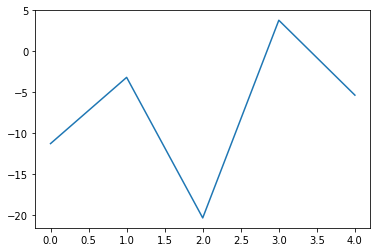

In [178]:
import matplotlib.pyplot as plt
plt.plot(rew)
plt.show()

In [19]:
minerl.data.download('./experiments',experiment='MineRLNavigateDense-v0')

./experiments\MineRLNavigateDense-v0 exists - skipping re-download!


'./experiments'

In [ ]:
# Sample some data from the dataset!
data = minerl.data.make("MineRLNavigateDense-v0")

In [ ]:
# Iterate through a single epoch using sequences of at most 32 steps
for current_state, action, reward, next_state, done in data.batch_iter(num_epochs=1, batch_size=1, seq_len=32):
    print(current_state)
    break